<a href="https://colab.research.google.com/github/hera1228/DAP_2023/blob/main/dap_w12_pub_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_med_org = pd.read_csv("https://raw.githubusercontent.com/6n23rp/ZGFwMjNtaWRkYXRh/main/dzEy/aW5zdXJhbmNl.csv")
df_car_org = pd.read_csv("https://raw.githubusercontent.com/6n23rp/ZGFwMjNtaWRkYXRh/main/dzEy/Q2FyUHJpY2VfQXNzaWdubWVudA%3D%3D.csv")

print(df_med_org.info())
print(df_car_org.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    ob

## **1. 단순선형회귀**

주석을 참고하세요.

In [ ]:
# 1-a-데이터 준비
# 의료비용 데이터셋인 df_meds의 연속형 변수인 독립변수들과 종속변수(의료비용)을 각각 X, y로 분리합니다.

df_meds = df_med_org.copy(deep = True)

X = df_meds[["age", "bmi", "children"]] #사용가능한 독립변수
y = df_meds["charges"] #종속변수

print(X)
print(y)

      age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
# 1-a-train/test 데이터 분리
# 기계학습에 있어서, train set이란 "지금까지 관측된 데이터"를 말하며, test set이란 "지금까지 관측되지 않은 데이터"를 말합니다.
# 학습은 지금까지 관측된 데이터인 train set을 이용하여 수행하고, 학습이 잘 되었는지를 확인하기 위해 test set의 독립변수를 이용해 종속변수의 값을 얼마나 잘 예측하였는지를 평가합니다.
# 원론적으로, test set의 모든 내용은 연구자 본인 또한 알지 못한다는 가정을 해야하며, test set의 내용이 학습의 그 어떤 과정에도 영향을 주어서는 안됩니다.
# train/test set 분리 기준은 '시계열 데이터'의 경우 시간의 흐름에 따라 특정 시점 이후의 데이터를 test set으로 이용하는 등 특수한 경우를 제외하고는 무작위로 분리합니다.
# 무작위로 데이터를 분리할 때, 가장 간편하게 하는 방법은 sklearn의 train_test_split을 이용하는 것입니다.

from sklearn.model_selection import train_test_split

# train_test_split은 X, y 순서로 데이터를 받고, test set이 전체 데이터셋에서 차지할 비율을 test_size(비율) 파라미터에 전달하여 호출합니다.
# 반환값의 순서는 아래 변수명을 참고하세요.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #train set 의 독립변수, -의 도...?, -의 종속변수

# train set의 크기를 확인합니다.
print(len(X_train), len(y_train))

# test set의 크기를 확인합니다.
print(len(X_test), len(y_test))

1070 1070
268 268


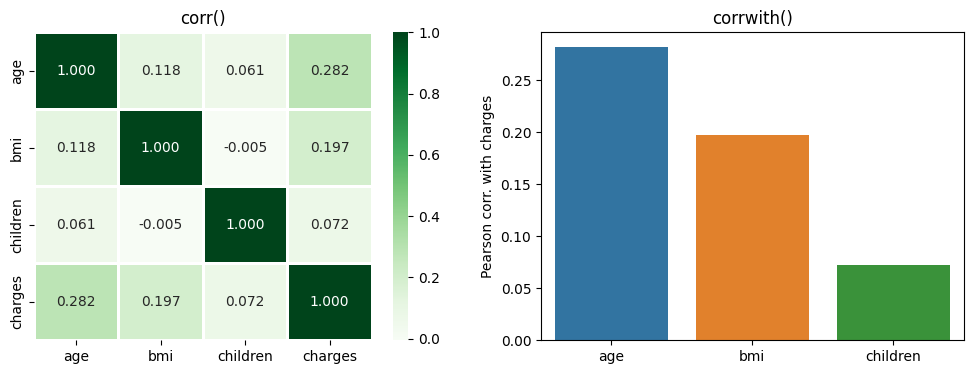

In [ ]:
# 1-a-연속변수인 독립변수 중 종속변수(charges: 의료비용)와 강한 상관관계를 가지는 변수를 찾기
# 변수간 상관관계의 정도를 확인할 때에는 상관계수를 계산해야합니다.
# 동일 데이터프레임 내 변수간의 상관계수를 계산하고자 할 때에는 pd.DataFrame.corr()를 이용합니다.
# X와 y를 column-wise로 concat하여 위 메서드를 이용해도 됩니다.
# 만약, X와 y를 따로 둔 상태에서 상관계수를 확인하고자 한다면 pd.DataFrame.corrwith(pd.DataFrame)을 이용합니다.
# 예시를 확인해보세요.

# 두 그래프를 동시에 표시하기 위한 작업입니다. 따라할 필요 없습니다.
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# X와 y를 concat하여 corr() 메서드를 이용해 상관계수를 계산합니다.
# X와 y를 column-wise로 concat합니다.
X_y_concat = pd.concat([X_train, y_train], axis = 1)

# concat된 pd.DataFrame의 corr() 메서드를 호출하여 상관계수를 계산하고, 상관계수 행렬을 seaborn의 heatmap()에 넘겨 상관계수 히트맵을 그립니다.
# 히트맵을 보면, corr()는 pd.DataFrame 내 모든 변수간의 상관계수를 계산하는 것을 확인할 수 있습니다.
sns.heatmap(X_y_concat.corr(), annot = True, fmt = '.3f', linewidth = 1, cmap = 'Greens', ax = axes[0]).set(title = 'corr()')

# X와 y를 따로 둔 상태에서 상관계수를 계산합니다.
corrs = X_train.corrwith(y_train)

# corrwith()는 pd.Series를 반환합니다. 상관계수 Series의 index와 values를 넘겨 barplot을 그립니다.
sns.barplot(x = corrs.index, y = corrs.values, ax = axes[1]).set(title = 'corrwith()', ylabel = 'Pearson corr. with charges')

plt.show()

# 그래프를 보면, 연속변수인 독립변수 중에는 나이(age)가 종속변수인 charges와 가장 높은 상관계수를 가져, 비교적 뚜렷한 상관관계를 보임을 확인할 수 있습니다.
# 위 두 방법 중 원하는대로 선택하여 사용하세요.

In [ ]:
# 1-a-선형회귀 수행하기
from sklearn.linear_model import LinearRegression

# sklearn의 LinearRegression 클래스를 이용하면 간단하게 선형회귀를 수행할 수 있습니다.
model = LinearRegression()

# sklearn.LinearRegression은 X로 2-d array, y로 1-d array를 받습니다. 왜 X로 2-d array를 받는지는 2.에서 확인합니다.
# 우리는 age만을 독립변수로 이용할 것이기 때문에, 1-d array를 2-d array로 만들기 위해 reshape(-1, 1)를 수행합니다.
# 학습에는 fit() 메서드를 이용합니다.
model.fit(X_train.age.values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
# 1-a-성능 평가하기
from sklearn.metrics import mean_squared_error

# train set 데이터를 이용해 학습된 선형회귀 모델을 이용해 test set에 대한 예측을 수행합니다.
# 예측 대상은 y_test, 즉 test set의 "정답"이고, 이 "정답"을 맞추기 위해 X_test, 즉 "정답"을 맞추기 위해 주어진 값을 이용합니다.
# 예측에는 모델의 predict() 메서드를 이용합니다. fit()과 마찬가지로 X로 2-d array를 받기 때문에, 동일하게 reshape(-1, 1)를 수행합니다.
y_predict = model.predict(X_test.age.values.reshape(-1, 1))

# y_test를 예측한 값인 y_predict와 y_test를 비교하여 예측 성능을 평가합니다.
# 평가 지표로는 RMSE(Root Mean Squared Error)를 이용합니다.
# MSE는 오차(Error)에 제곱(Square)을 취한 것의 평균으로, 실제 예측 대상(y)의 단위의 제곱을 기준으로 매겨집니다.
# RMSE는 이러한 MSE에 제곱근(Root)를 씌운 것으로, 실제 예측 대상의 단위와 동일하게 매겨집니다.
# 둘 중 어떤 것을 사용할지는 자유이나, 보통은 RMSE를 더 많이 사용합니다.
# MSE와 RMSE 둘 다 낮을수록 예측 성능이 좋은 것입니다.

# MSE를 계산할 때에는 간단하게 sklearn의 mean_squared_error를 이용합니다.
# "정답"인 y_test, "예측값"인 y_predict 순서대로 받아 호출하고, MSE를 반환합니다.
mse = mean_squared_error(y_test, y_predict)

# RMSE는 MSE에 단순히 제곱근을 씌웁니다. 제곱근 계산은 numpy의 sqrt()를 이용합니다.
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 135983957.4805469
RMSE : 11661.21595205864


In [ ]:
# 1-a-예측값과 실제값 비교해보기
# 한번 모델이 예측한 값과 실제 정답을 비교해보겠습니다.

pd.DataFrame({"predicted" : y_predict, "truth" : y_test})

,predicted,truth
764,14703.773875,9095.06825
887,12538.404837,5272.17580
890,19275.108511,29330.98315
1293,14944.370434,9301.89355
259,8448.263320,33750.29180
...,...,...
109,19034.511951,47055.53210
575,17831.529152,12222.89830
535,13019.597956,6067.12675
543,16869.142913,63770.42801


In [ ]:
# 1-a-다른 독립변수 사용해보기
# 위 예시에서는 age를 독립변수로 이용하였습니다. 다른 독립변수를 이용한 예시로, bmi를 이용해보겠습니다.
# 위 예시와 동일한 절차를 밟되, 독립변수로 bmi를 넘깁니다.
model = LinearRegression()
model.fit(X_train.bmi.values.reshape(-1, 1), y_train)
y_predict = model.predict(X_test.bmi.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

# MSE, RMSE를 보면, 그리 큰 차이는 아니나 age를 이용하였을 때 MSE, RMSE가 더 작기 때문에, age를 이용한 경우가 예측성능이 더 좋음을 확인할 수 있습니다.

MSE : 149085057.03839505
RMSE : 12210.039190698571


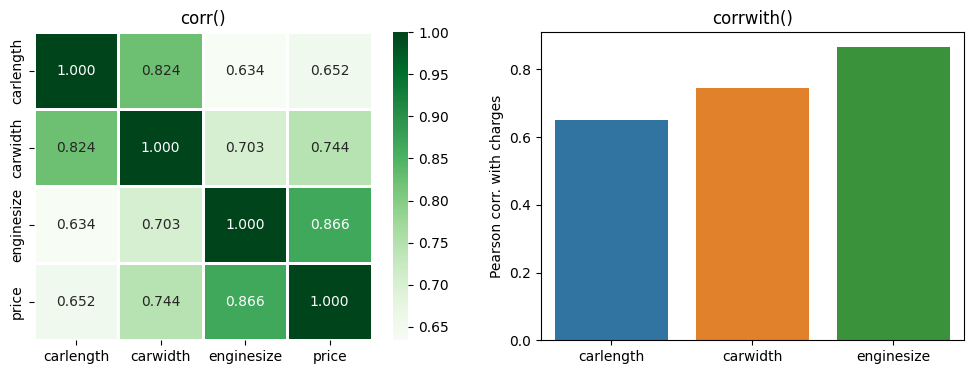

MSE : 15465458.96590847
RMSE : 3932.614774664367


In [ ]:
# 1-ex.

# 주어진 데이터를 이용해 자동차의 가격(price)을 종속변수로 하여 이를 예측해보세요.
# 독립변수로는 연속변수 중 가격과 상관계수의 절대값이 가장 높은 것을 이용하세요.
# test set의 비율은 0.2로 지정하세요.
# 평가지표로는 MSE, RMSE를 둘 다 나타내세요.
# train_test_split()의 random_state 파라미터에 42를 입력해야 예시 출력과 동일한 결과가 나올 수 있습니다. (필수는 아닙니다)

df_cars = df_car_org.copy(deep = True)
######>
X=df_cars[['carlength', 'carwidth', 'enginesize']]
y=df_cars['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

fig, axes = plt.subplots(1, 2, figsize = (12, 4))
X_y_concat = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(X_y_concat.corr(), annot = True, fmt = '.3f', linewidth = 1, cmap = 'Greens', ax = axes[0]).set(title = 'corr()')
corrs = X_train.corrwith(y_train)
sns.barplot(x = corrs.index, y = corrs.values, ax = axes[1]).set(title = 'corrwith()', ylabel = 'Pearson corr. with charges')

plt.show()

model = LinearRegression()
model.fit(X_train.enginesize.values.reshape(-1, 1), y_train)

y_predict = model.predict(X_test.enginesize.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
######<


## **2. 다중선형회귀**

주석을 참고하세요.

독립변수 n개
y= a1x1 + a2x2 + a3x3 + b

In [ ]:
# 2-a-데이터 준비 및 데이터 분리
df_meds_2 = df_med_org.copy(deep = True)

# 연속형 변수를 가지는 모든 독립변수 열을 X로 지정
X = df_meds_2[df_meds_2.columns.difference(["charges"])].select_dtypes(np.number)
y = df_meds_2["charges"]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 크기 확인
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

1070 1070
268 268


In [ ]:
# 2-a-다중선형회귀 수행
# 선형회귀는 y와 y_pred를 최소화하는 y_pred = ax + b의 a와 b를 찾는 것을 목표로 합니다.
# 이 때, ax는 독립변수가 여러 개이면 a1x1 + a2x2 + ... + anxn과 같은 형식으로 일반화할 수 있습니다.
# 다중선형회귀는 이와 같이 여러 독립변수를 이용한 식인 y_pred = a1x1 + a2x2 + ... + anxn + b의 오류를 최소화하는 a1, a2, ..., an, b를 찾는 것을 목표로 합니다.
# 이는 단순히 두 변수의 관계만을 이용해 예측하는 것이 아니라, 보다 복잡한 관계를 이용해 예측한다고 해석할 수 있겠습니다.
# 과정은 하나의 독립변수를 이용할 때와 동일합니다.

# 동일하게 LinearRegression 클래스를 이용합니다.
model = LinearRegression()

# 독립변수가 여러개이므로, 2-d array이기 때문에 reshape를 수행할 필요는 없습니다.
model.fit(X_train, y_train)

# 성능 평가 또한 동일하게 수행합니다.
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

# 결과를 확인해보면, 하나의 독립변수를 이용한 경우보다 근소하게 예측 성능이 좋은 것을 확인할 수 있습니다.

MSE : 131201335.64669803
RMSE : 11454.315153980095


In [ ]:
# 2-ex.

# 주어진 데이터를 이용해 자동차의 가격(price)을 종속변수로 하여 이를 예측해보세요.
# 독립변수로는 모든 연속변수를 이용하세요.
# test set의 비율은 0.2로 지정하세요.
# 평가지표로는 MSE, RMSE를 둘 다 나타내세요.
# train_test_split()의 random_state 파라미터에 42를 입력해야 예시 출력과 동일한 결과가 나올 수 있습니다. (필수는 아닙니다)

df_cars_2 = df_car_org.copy(deep = True)

######>

X = df_cars_2[df_cars_2.columns.difference(["price"])].select_dtypes(np.number)
y = df_cars_2["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 크기 확인

model = LinearRegression()

# 독립변수가 여러개이므로, 2-d array이기 때문에 reshape를 수행할 필요는 없습니다.
model.fit(X_train, y_train)

# 성능 평가 또한 동일하게 수행합니다.
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

######<

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 11710105.078807428
RMSE : 3422.0030798944977


## **3. 선형회귀에서 범주형 변수의 이용**

주석을 참고하세요.

In [ ]:
# 3-a-데이터 준비
df_meds_3 = df_med_org.copy(deep = True)

# 종속변수가 아닌 모든 열을 X로 지정
X = df_meds_3[df_meds_3.columns.difference(["charges"])]
y = df_meds_3["charges"]

In [ ]:
# 3-a-범주형 변수의 이용
# 선형회귀는 실제 값을 가지는 연속형 변수만을 이용할 수 있습니다.
# 범주형 변수는 분명한 높낮이를 가지는 수치가 아니기 때문에(["Male", "Female"], ["America", "Asia", ...]) 이를 선형회귀에 이용하려면 어떻게든 수치로 만들어야 합니다(즉, 인코딩을 하여야 합니다).
# 가장 간단한 방법은 원-핫 인코딩을 적용하는 것입니다.

# pd.get_dummies()를 이용해 범주형 변수를 원-핫 인코딩으로 수치화시킵니다.
X = pd.get_dummies(X)
X

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,0,0,0,1,1,0,0,1
1,18,33.770,1,0,0,1,0,0,1,1,0
2,28,33.000,3,0,0,1,0,0,1,1,0
3,33,22.705,0,0,1,0,0,0,1,1,0
4,32,28.880,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,0,1,1,0
1334,18,31.920,0,1,0,0,0,1,0,1,0
1335,18,36.850,0,0,0,1,0,1,0,1,0
1336,21,25.800,0,0,0,0,1,1,0,1,0


In [ ]:
# 3-a-데이터 분리 및 다중선형회귀 수행
# 범주형 변수에 인코딩을 적용한 이후에는 연속형 변수만을 이용한 경우와 같이 동일한 과정을 밟아 수행합니다.

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 선형회귀 모델
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_predict = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

# 결과를 보면 2-a.에서 연속형 변수만을 이용한 다중선형회귀보다 성능이 크게 좋아진 것을 확인할 수 있습니다.

MSE : 178507387.43158212
RMSE : 13360.665680705513


In [ ]:
# 3-ex.

# 주어진 데이터를 이용해 자동차의 가격(price)을 종속변수로 하여 이를 예측해보세요.
# 독립변수로는 차량 이름("CarName")을 제외한, 범주형 변수를 포함한 모든 변수를 이용하세요.
# 범주형 변수의 인코딩은 원-핫 인코딩을 이용하세요.
# test set의 비율은 0.2로 지정하세요.
# 평가지표로는 MSE, RMSE를 둘 다 나타내세요.
# train_test_split()의 random_state 파라미터에 42를 입력해야 예시 출력과 동일한 결과가 나올 수 있습니다. (필수는 아닙니다)

df_cars_3 = df_car_org.copy(deep = True)

######>
X = df_cars_3[df_cars_2.columns.difference(["price"])]
y = df_cars_2["price"]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 선형회귀 모델
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_predict = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

######<

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 178507387.43158212
RMSE : 13360.665680705513
